<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#0CC700;overflow:hidden;font-weight:800">Global Inflation - Dollar vs Real</div>

In [4]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## <b><div style='padding:15px;background-color:#0CC700;color:white;border-radius:2px;font-size:110%;text-align: center'>1  |  About Dataset and Code</div></b>

**Context**

Understanding global economic dynamics, specifically the trends in inflation rates, is paramount for policymakers, economists, and researchers. This dataset, covering the years 1980 to 2024, offers a comprehensive perspective on inflation across various countries. The primary focus is on dissecting the data based on country-specific indicators, providing valuable insights into the multifaceted factors influencing economic environments on a global scale.

**Content**

The dataset comprises crucial columns including country name, indicator type, and annual average inflation rates from 1980 to 2024. This extensive collection of information facilitates detailed analysis and correlation studies, enabling researchers to uncover patterns and trends. By examining the nuanced relationships between country-specific indicators and inflation rates, valuable conclusions can be drawn about the complexities of global economic dynamics over the years. This dataset serves as a valuable resource for anyone seeking to delve into the intricacies of inflation trends and their implications across diverse nations.

**Acknowledgment**

The primary dataset was retrieved from the World Bank.

**Inflation, consumer prices (annual %)**

International Monetary Fund, International Financial Statistics and data files. World Bank Group

<div class="alert alert-block alert-info" style="background-color:#E1FEE6;color:#03A620;border-color:black;width:80%;margin: auto;text-align: center;"><b>Code:</b> This study aims to analyze the evolution of inflation from 1994 to 2024 with the currencies of the United States (Dollar) and Brazil (Real).

**The period (1994 to 2024) was defined because in 1994 the new Brazilian currency (Real) was created and the values ​​were equated, that is, 1 Dollar = 1 Real.**

## <b><div style='padding:15px;background-color:#0CC700;color:white;border-radius:2px;font-size:110%;text-align: center'>2  |  Libraries</div></b>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#0CC700;color:white;border-radius:2px;font-size:110%;text-align: center'>3  |  Dataset</div></b>

In [6]:
df=pd.read_csv('/Users/phutharesuanwachirapisut/Programming/Dataset/global_inflation_data.csv')
df.head()

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Annual average inflation (consumer prices) rate,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,...,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN
1,Albania,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0
2,Algeria,Annual average inflation (consumer prices) rate,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,...,4.80,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8
3,Andorra,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.10,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5
4,Angola,Annual average inflation (consumer prices) rate,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,...,9.20,30.70,29.80,19.60,17.1,22.30,25.80,21.40,13.1,22.3


## <b><div style='padding:15px;background-color:#0CC700;color:white;border-radius:2px;font-size:110%;text-align: center'>4  |  Inspecting Dataframe Structure</div></b>

In [7]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (196, 47)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
country_name,object,0,0.000000,0,196,196,NaN,NaN,NaN,NaN,Afghanistan,Albania,Algeria
indicator_name,object,0,0.000000,0,1,196,NaN,NaN,NaN,NaN,Annual average inflation (consumer prices) rate,Annual average inflation (consumer prices) rate,Annual average inflation (consumer prices) rate
1980,float64,56,0.285714,0,108,140,-7.3,316.6,21.757143,33.656118,13.4,NaN,9.7
1981,float64,52,0.265306,0,110,144,0.0,116.8,17.796528,18.992691,22.2,NaN,14.6
1982,float64,51,0.260204,0,118,145,-0.9,123.6,17.029655,22.797064,18.2,NaN,6.6
1983,float64,51,0.260204,0,124,145,-8.5,275.6,19.177241,34.806824,15.9,NaN,7.8
1984,float64,51,0.260204,0,115,145,-7.4,1281.3,26.97931,111.889811,20.4,NaN,6.3
1985,float64,51,0.260204,0,115,145,-16.0,11749.6,103.215172,975.748316,8.7,NaN,10.4
1986,float64,51,0.260204,0,117,145,-17.6,885.2,25.262069,86.93121,-2.1,NaN,14.0
1987,float64,49,0.250000,0,120,147,-31.2,13109.5,111.294558,1081.094434,18.4,NaN,5.9


In [8]:
# Deleting unnecessary columns
df.drop(["indicator_name", "1980", "1981", "1982", "1983", "1984", "1985", "1986",
         "1987", "1988", "1989", "1990", "1991", "1992", "1993"], axis=1, inplace=True)


<div class="alert alert-block alert-info" style="background-color:#E1FEE6;color:#03A620;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight:</b> I will change the value of Brazil's inflation in 1994 because the Real was only created in July 1994. Therefore, I will only use inflation from the second half of this year.

In [9]:
# Changing Brazil inflation in 1994
df.replace({2075.8:18.6}, regex=True,  inplace=True)

In [10]:
# Checking the country_name column
df['country_name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       "China, People's Republic of", 'Colombia', 'Comoros',
       'Congo, Dem. Rep. of the', 'Congo, Republic of ', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 

## <b><div style='padding:15px;background-color:#0CC700;color:white;border-radius:2px;font-size:110%;text-align: center'>5  |  Exploratory Data Analysis - EDA</div></b>

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#0CC700'> United States / Brazil</span></b>

In [11]:
# Let's create a dataframe just for the United States's data
df_us = df[df['country_name'] == 'United States']
df_us.drop(["country_name"], axis=1, inplace=True)
df_us = df_us.T
df_us = df_us.reset_index()
df_us.rename(columns = {186:'United_States'}, inplace = True)
df_us.head()

,index,United_States
0,1994,2.6
1,1995,2.8
2,1996,2.9
3,1997,2.3
4,1998,1.5


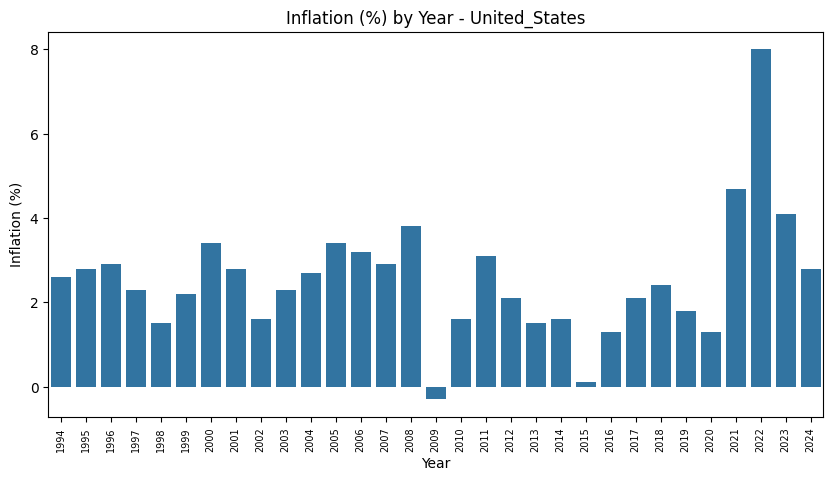

In [12]:
# create bar plot Inflation (%) by Year - United_States

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = "index", y = "United_States", data = df_us)
plt.title("Inflation (%) by Year - United_States", fontsize = 12)
plt.xticks(rotation=90, fontsize = 7)
ax.set_xlabel("Year")
ax.set_ylabel("Inflation (%)")

plt.show()


In [13]:
# Let's create a dataframe just for the Brazil's data

df_br = df[df['country_name'] == 'Brazil']
df_br.drop(["country_name"], axis=1, inplace=True)
df_br = df_br.T
df_br = df_br.reset_index()
df_br.rename(columns = {24:'Brazil'}, inplace = True)
df_br.head()

,index,Brazil
0,1994,18.6
1,1995,66.0
2,1996,15.8
3,1997,6.9
4,1998,3.2


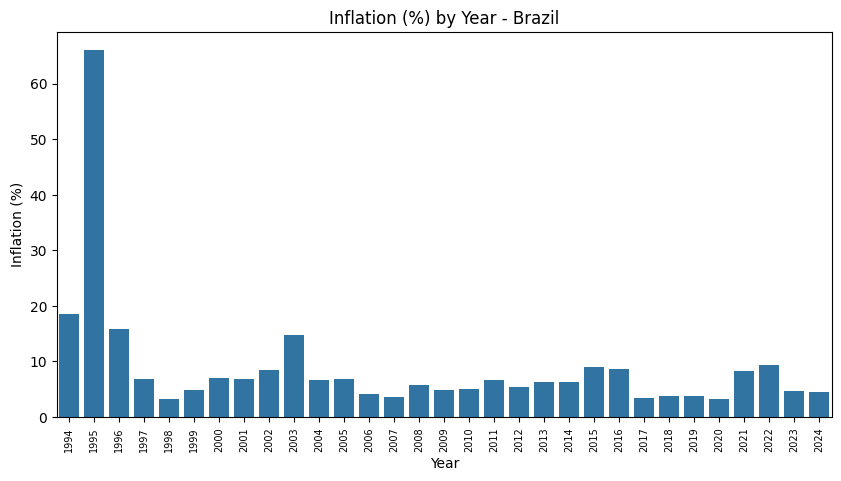

In [14]:
# create bar plot Inflation (%) by Year - Brazil

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = "index", y = "Brazil", data = df_br)
plt.title("Inflation (%) by Year - Brazil", fontsize = 12)
plt.xticks(rotation=90, fontsize = 7)
ax.set_xlabel("Year")
ax.set_ylabel("Inflation (%)")

plt.show()

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#0CC700'> 1994 - 2024 / Dollar vs Real</span></b>  

In [15]:
# Creating a dataframe for Brazil and United States
df_2 = df.loc[df['country_name'].isin(['Brazil', 'United States'])]

# New column to be added for 1993 with initial values equal to zero.
new_col = [0, 0] 
  
# Inserting the column  1993 at the beginning in the DataFrame. 
df_2.insert(loc = 0,
          column = '1993',
          value = new_col)

# Placing the country_name column as index and transposing the dataframe
df_2 = df_2.set_index('country_name').T

# Dividing the inflation columns by 100 to convert the values to percentages.
df_2['Brazil'] = df_2['Brazil'] / 100
df_2['United States'] = df_2['United States'] / 100

# Creating columns for both countries accumulating inflations using cumprod()
df_2['Brazil_accum'] = (1 + df_2['Brazil']).cumprod()
df_2['US_accum'] = (1 + df_2['United States']).cumprod()

# Creating columns for both countries with the devaluation of their respective currencies
df_2['Real(R$)'] = 1 / df_2['Brazil_accum']
df_2['Dollar(U$)'] = 1 / df_2['US_accum']

# Creating a column with the correlations between the two currencies devalued by inflation
df_2['Dollar/Real'] = df_2['Dollar(U$)'] / df_2['Real(R$)']

# Returning the index to a dataframe column
df_2['Year'] = df_2.index

df_2


country_name,Brazil,United States,Brazil_accum,US_accum,Real(R$),Dollar(U$),Dollar/Real,Year
1993,0.000,0.000,1.000000,1.000000,1.000000,1.000000,1.000000,1993
1994,0.186,0.026,1.186000,1.026000,0.843170,0.974659,1.155945,1994
1995,0.660,0.028,1.968760,1.054728,0.507934,0.948112,1.866604,1995
1996,0.158,0.029,2.279824,1.085315,0.438630,0.921391,2.100610,1996
1997,0.069,0.023,2.437132,1.110277,0.410318,0.900676,2.195066,1997
1998,0.032,0.015,2.515120,1.126932,0.397595,0.887365,2.231831,1998
1999,0.049,0.022,2.638361,1.151724,0.379023,0.868264,2.290793,1999
2000,0.070,0.034,2.823046,1.190883,0.354227,0.839713,2.370550,2000
2001,0.068,0.028,3.015013,1.224227,0.331673,0.816842,2.462789,2001
2002,0.084,0.016,3.268275,1.243815,0.305972,0.803978,2.627621,2002


In [16]:
# Converting column Year to numeric.
df_2["Year"] = pd.to_numeric(df_2["Year"])

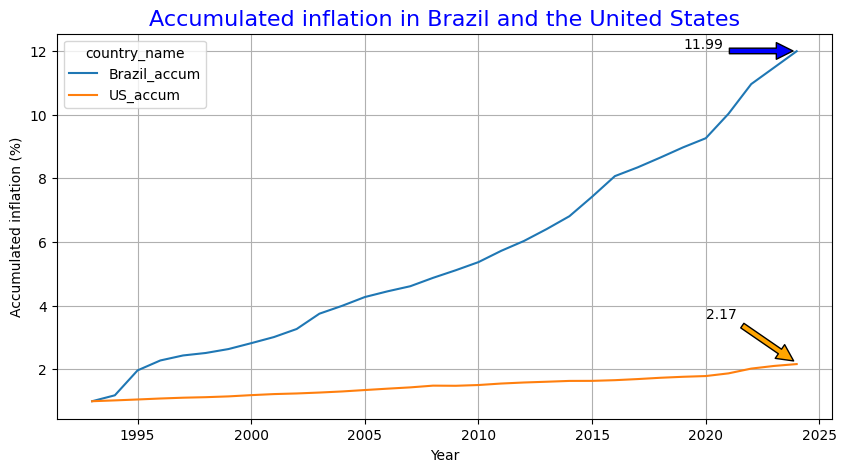

In [17]:
# Accumulated inflation in Brazil and the United States
# Period: from 1994 to 2024

df_2.plot(x="Year", y=['Brazil_accum', 'US_accum'],
              kind="line", figsize=(10, 5))
plt.title("Accumulated inflation in Brazil and the United States", fontsize = 16, color = 'blue')
plt.annotate('11.99',
      horizontalalignment = 'left',
      verticalalignment = 'bottom',
      xytext = (2019, 12),
      xy = (2024, 12),
      arrowprops = dict(facecolor = 'blue', shrink = 0.05))
plt.annotate('2.17',
      horizontalalignment = 'left',
      verticalalignment = 'bottom',
      xytext = (2020, 3.5),
      xy = (2024, 2.2),
      arrowprops = dict(facecolor = 'orange', shrink = 0.05))
plt.ylabel('Accumulated inflation (%)', rotation=90, fontsize = 10)
plt.grid()
plt.show()

* Comments
    * Note that the values of the two currencies are the same in 1993 (value = 1)
    * In 2024, accumulated Dollar inflation is 117%, which implies a correction factor of 2.17. In other words, in 2024 it will take 2.17 dollars to have the purchasing power of 1.00 dollar in 1994
        * Inflation calculation: (2.17 - 1) *100 = 117%
    * In 2024, accumulated Real inflation is 1099%, which implies a correction factor of 11.99. In other words, in 2024 it will take 11.99 reais to have the purchasing power of 1.00 real in 1994
        * Inflation calculation: (11.99 - 1) *100 = 1099%


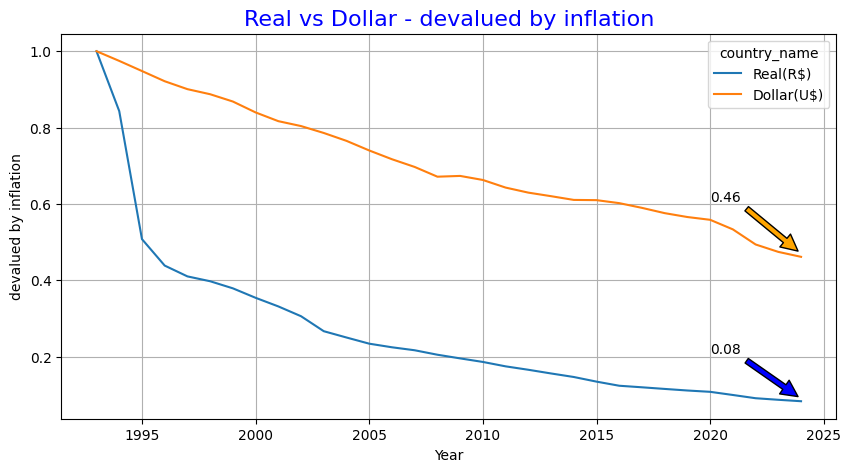

In [18]:
# Real vs Dollar - devalued by inflation
# Period: from 1994 to 2024

df_2.plot(x="Year", y=['Real(R$)', 'Dollar(U$)'],
              kind="line", figsize=(10, 5))
plt.title("Real vs Dollar - devalued by inflation", fontsize = 16, color = 'blue')
#plt.xticks(np.arange(07_1994, 2024, 5), rotation=45)
plt.ylabel('devalued by inflation', rotation=90, fontsize = 10)
plt.annotate('0.08',
      horizontalalignment = 'left',
      verticalalignment = 'bottom',
      xytext = (2020, 0.2),
      xy = (2024, 0.09),
      arrowprops = dict(facecolor = 'blue', shrink = 0.05))
plt.annotate('0.46',
      horizontalalignment = 'left',
      verticalalignment = 'bottom',
      xytext = (2020, 0.6),
      xy = (2024, 0.47),
      arrowprops = dict(facecolor = 'orange', shrink = 0.05))
plt.grid()
plt.show()

* Comments
    * Note that the values of the two currencies are the same in July 1994 (value = 1)
    * In 2024 one Dollar was devalued by inflation to 0.46.
    * In 2024 one Real was devalued by inflation to 0.08.

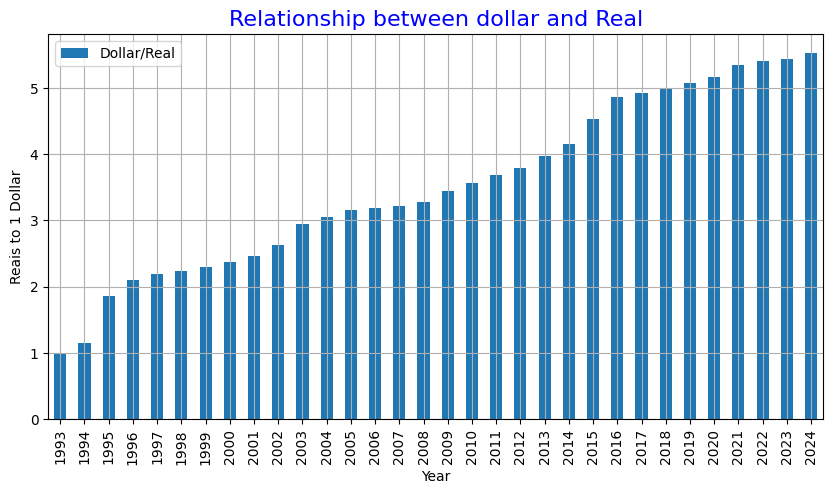

In [19]:
# Relationship between dollar and Real
# Period: from 1994 to 2024

df_2.plot(x="Year", y='Dollar/Real',
         kind="bar", figsize=(10, 5))
plt.title("Relationship between dollar and Real", fontsize = 16, color = 'blue')
plt.ylabel('Reais to 1 Dollar', rotation=90, fontsize = 10)
plt.grid()
plt.show()

* Comments
    * Note that the value starts at 1.00 in 1993
    * In 2024 the relationship between the Dollar and the Real is 1 : 5.53
    * This means that it would take 5.53 Reais to buy 1.00 Dollar.

* Final Comments
    * Today, June/30/2024 the Dollar exchange rate in relation to the Real is 1 : 5.59. This value is very close to the value found when applying the inflations of the two currencies over the last 30 years (1 : 5.53).
    * We can conclude that the current relationship of the two currencies reflects the inflation suffered from 1994 to 2024.

## <b><div style='padding:15px;background-color:#0CC700;color:white;border-radius:2px;font-size:110%;text-align: center'>I hope that you enjoyed. Thank you</div></b>